# Projekt zaliczeniowy

Celem projektu jest wizualizacja działania i porównanie skuteczności dwóch klasyfikatorów działających na zbiorze danych `iris` https://archive.ics.uci.edu/dataset/53/iris


### Klasyfikator 1 - drzewo decyzyjne

1. Przygotuj dane treningowe.
2. Wyucz model.
3. Zwizualizuj otrzymane drzewo decyzyjne.
4. Zwizualizuj tablicę pomyłek (*confusion matrix*).

### Klasyfikator 2 - sieci neuronowe

1. Przygotuj dane treningowe.
2. Zbuduj sieć według wybranej przez siebie architektury.
3. Wyucz model.
4. Zwizualizuj proces uczenia się (`categorical_loss`, `categorical_accuracy`).
5. Zwizualizuj tablicę pomyłek (*confusion matrix*).

### Porównanie skuteczności


Stwórz infografikę porównującą skuteczność obydwu modeli. - grafika lub seria grafik, porównująca oba modele


# Klasyfikator 1 - drzewo decyzyjne

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()


X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")


print(X.head())
print(y.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

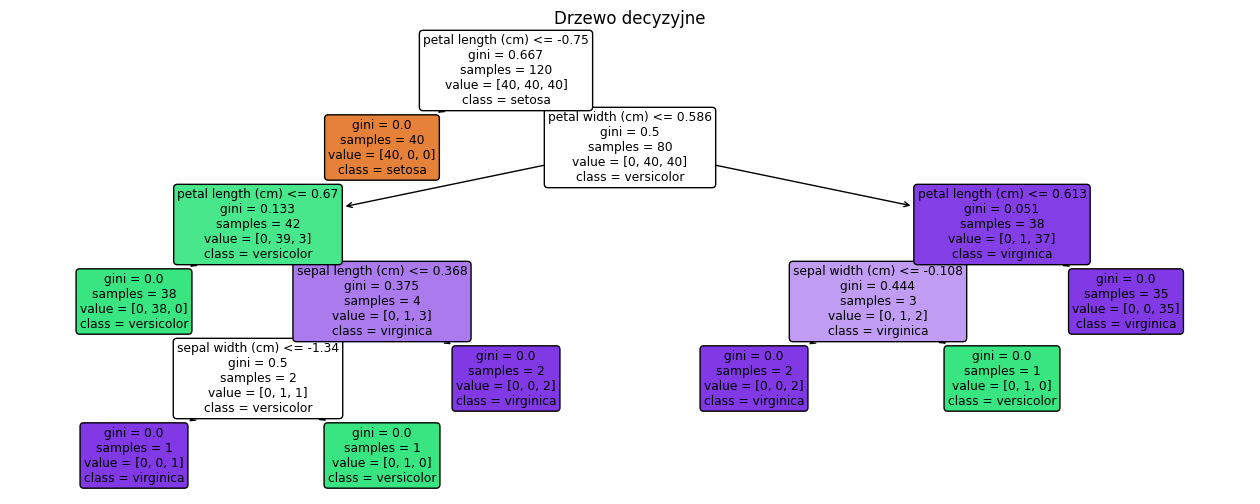

In [4]:
from sklearn.tree import plot_tree


plt.figure(figsize=(16, 6))
plot_tree(
    clf_tree,
    feature_names=X.columns,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title("Drzewo decyzyjne")
plt.show()


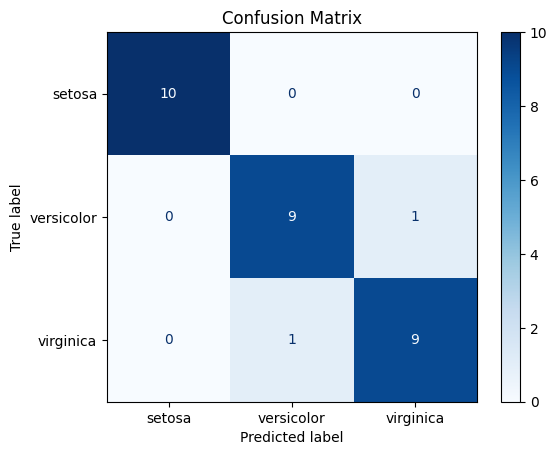

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_tree = clf_tree.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [6]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, target_names=iris.target_names))


Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [7]:

y_train_pred = clf_tree.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)



test_acc = accuracy_score(y_test, y_pred_tree)

print(f"Train accuracy: {train_acc:.2f}")
print(f"Test accuracy:  {test_acc:.2f}")

Train accuracy: 1.00
Test accuracy:  0.93


# Klasyfikator 2 - sieć neuronowa

In [8]:
# TYPE YOUR CODE BELOW
print(X_train_scaled.shape, X_test_scaled.shape)



(120, 4) (30, 4)


In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    max_iter=2000,
    early_stopping=False,
    random_state=42
)



mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=2000, random_state=42)

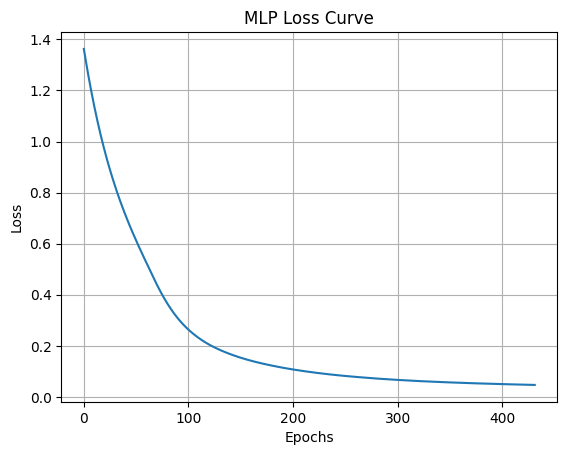

In [10]:
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MLP Loss Curve")
plt.grid(True)
plt.show()

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



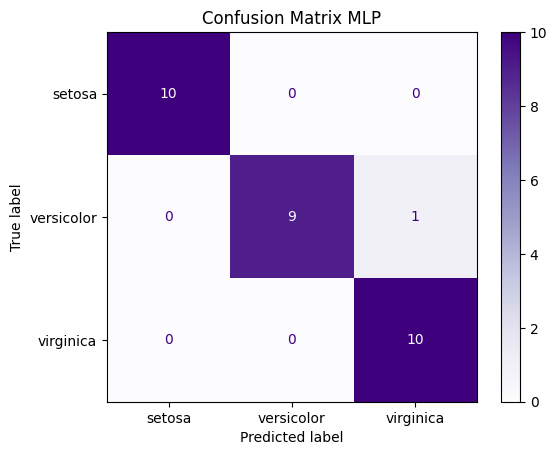

In [11]:
y_pred_mlp = mlp.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Purples")
plt.title("Confusion Matrix MLP")
plt.show()

In [12]:

y_train_pred_mlp = mlp.predict(X_train_scaled)
train_acc_mlp = accuracy_score(y_train, y_train_pred_mlp)


test_acc_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Train accuracy: {train_acc_mlp:.2f}")
print(f"Test accuracy:  {test_acc_mlp:.2f}")

Train accuracy: 0.98
Test accuracy:  0.97


# Porównanie modeli

In [13]:
# TYPE YOUR CODE BELOW

models = ['Decision Tree', 'MLP']
accuracies = [0.93, 0.97]
f1_scores = [0.93, 0.97]  

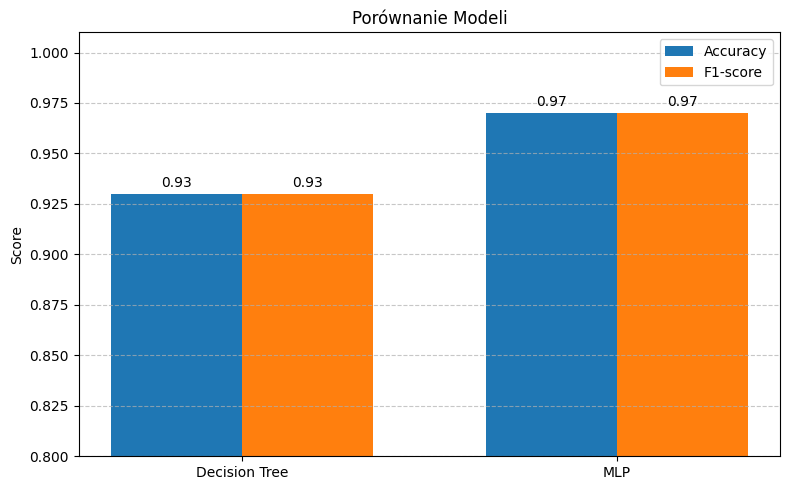

In [14]:

x = range(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x, accuracies, width, label='Accuracy')
bars2 = ax.bar([i + width for i in x], f1_scores, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Porównanie Modeli')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models)
ax.set_ylim(0.80, 1.01)  

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

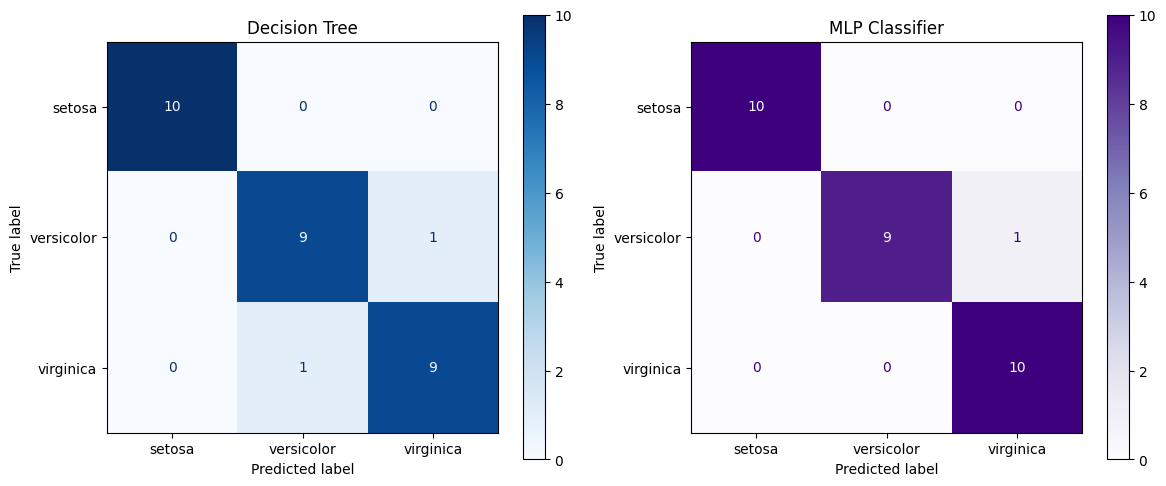

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Drzewo
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, ax=axs[0], display_labels=iris.target_names, cmap='Blues')
axs[0].set_title("Decision Tree")

# MLP
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, ax=axs[1], display_labels=iris.target_names, cmap='Purples')
axs[1].set_title("MLP Classifier")

plt.tight_layout()
plt.show()